# Problem Statement
Predict the salary if the employee using the features provided in the data. 

In [31]:
import pandas as pd
import numpy as np

In [32]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

In [33]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [34]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

About the columns

1.rank
It shows the service they are providing like prof or asstprof etc.

2.discipline
it shows the rank of discipline they have.

3.yrs.since.phd
it shows since how many years that person completed they phd degree

4.yrs.service
it shows the working experience of the paticular person

5.sex
it shows the person is male or female

6.salary
it shows the salary they got

In [35]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# EDA

Scatterplot

<AxesSubplot:xlabel='discipline', ylabel='rank'>

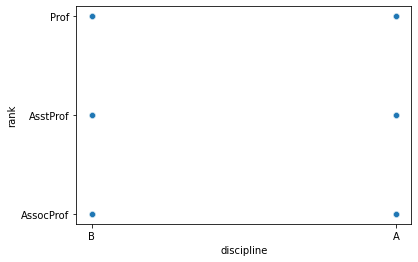

In [36]:
import seaborn as sns
sns.scatterplot(x="discipline",y="rank",data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='rank'>

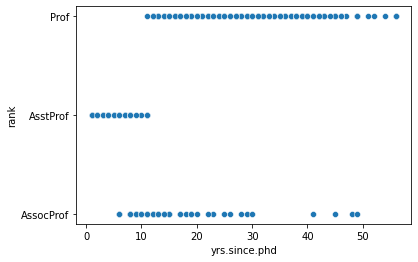

In [37]:
sns.scatterplot(x="yrs.since.phd",y="rank",data=df)

we can see in the range of yrs since phd between 0 to 13

<AxesSubplot:xlabel='yrs.service', ylabel='rank'>

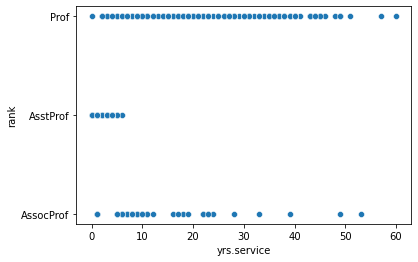

In [38]:
sns.scatterplot(x="yrs.service",y="rank",data=df)

we can see in the range of yrs of service between 0 to 10

<AxesSubplot:xlabel='sex', ylabel='rank'>

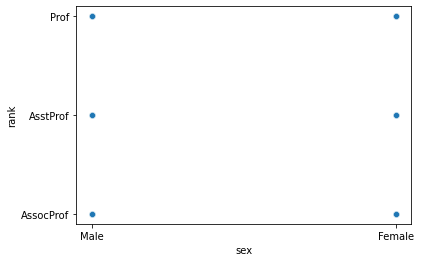

In [39]:
sns.scatterplot(x="sex",y="rank",data=df)

<AxesSubplot:xlabel='salary', ylabel='rank'>

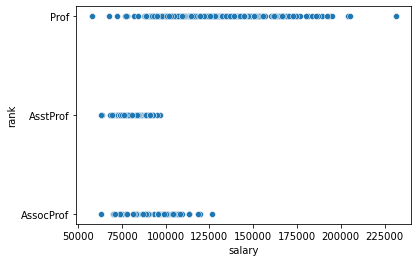

In [40]:
sns.scatterplot(x="salary",y="rank",data=df)

we can see in the range of salary between 60000 to 100000

# Correlation

In [41]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<AxesSubplot:>

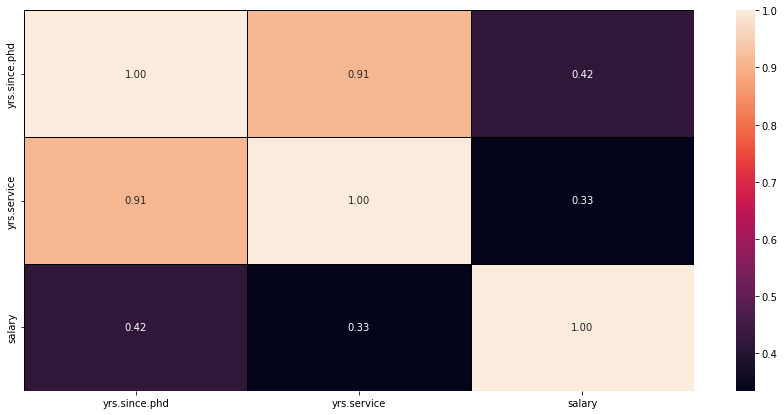

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor="black", fmt=".2f")

# Outcome of Correlation

All the columnsv of dataset is positivly correlated to the target columns

max correlation with :- yrs.since.phd
    
min correlation with :- yrs.service


# Describing Dataset

In [43]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


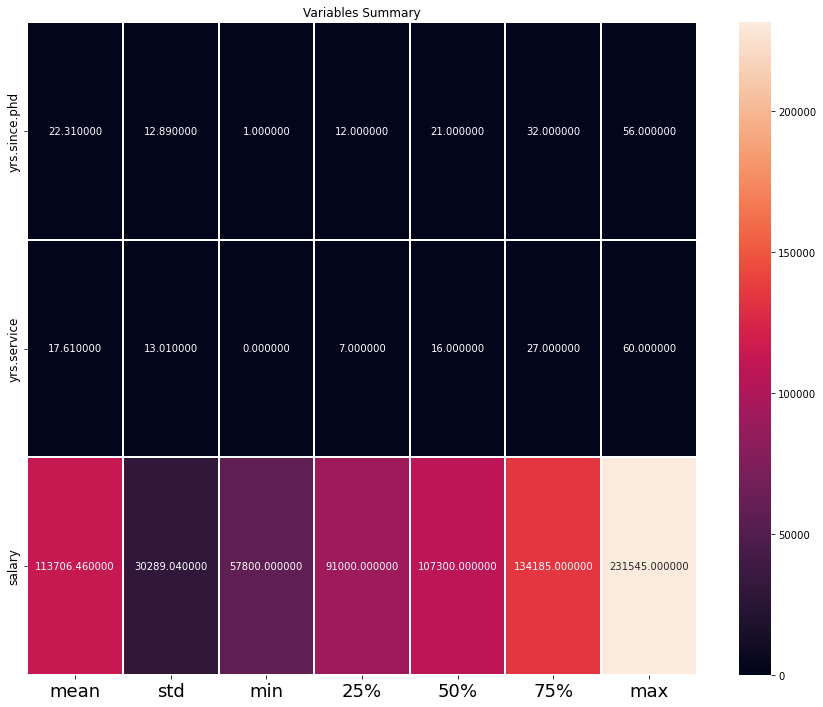

In [44]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

# Outcome of describe datasets

Salary

mean = 113706.460000
std = 30289.040000
min = 57800.000000
max = 231545.000000

yrs.service

mean = 17.610000
std = 13.010000
min = 0.000000
max = 60.000000

yrs.since.phd

mean = 22.310000
std = 12.890000
min = 1.000000
max = 56.000000

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [46]:
df.skew()

C:\Users\Nirav\AppData\Local\Temp/ipykernel_17376/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

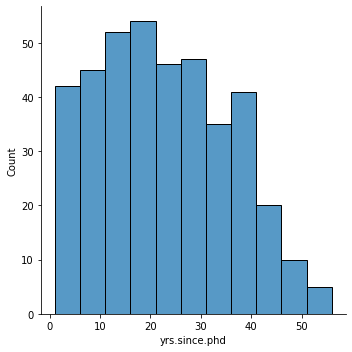

In [47]:
sns.displot(df["yrs.since.phd"])

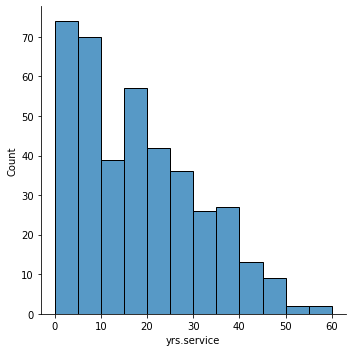

In [48]:
sns.displot(df["yrs.service"])

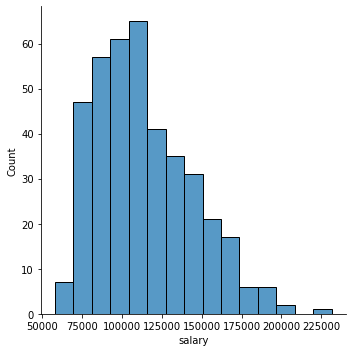

In [49]:
sns.displot(df["salary"])

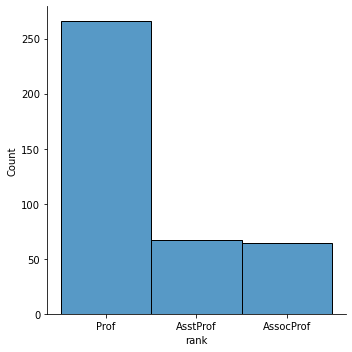

In [50]:
sns.displot(df["rank"])

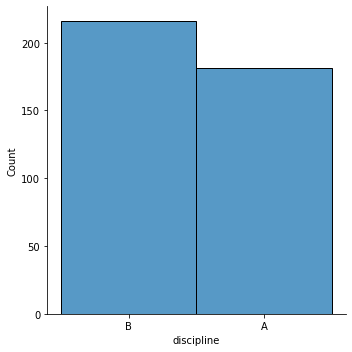

In [51]:
sns.displot(df["discipline"])

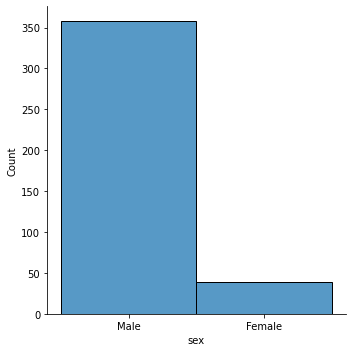

In [52]:
sns.displot(df["sex"])